# Discrete Fourier Transform 
Explanation to code adapted from: [here](https://blog.demofox.org/2016/08/11/understanding-the-discrete-fourier-transform/) 

## Signal to Waves
Goal: Given a stream of data (e.g. [1, 2, 1, 0, 1, 2, ....]), can we generate a sum of sine/cosine waves to represent it?

One possible use case is to generate negation signals like for noise cancellation.

1j


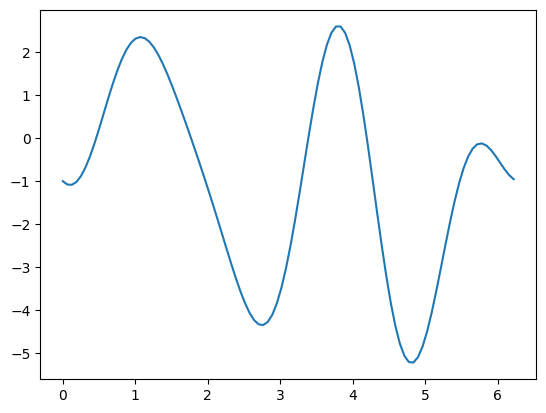

In [41]:
import numpy as np
import matplotlib.pyplot as plt

c1 = complex(1, 0)
c2 = complex(0, 1)
print(c1 * c2)

# \sin(x)+2\sin(2x)\ +2\sin\left(3x\ +\ \pi\right)+\sin\left(4x\ +\ \frac{3\pi}{2}\right)-1.5\sin\left(\frac{1}{2}x\right)
# Goal, ignoring that we know how the signal was generated, is to find the frequency components of the signal?
def original(x):
    return np.sin(x) + 2*np.sin(2*x) + 2*np.sin(3*x + np.pi) + np.sin(4*x + 3*np.pi/2) - 1.5*np.sin(0.5*x)

x = np.linspace(0, 2*np.pi, 101)
# Due to the periodic nature of the signal, we can remove the last index
x = x[0:-1]
original_signal_stream = np.array(original(x)) 

plt.plot(x, original_signal_stream)


## 

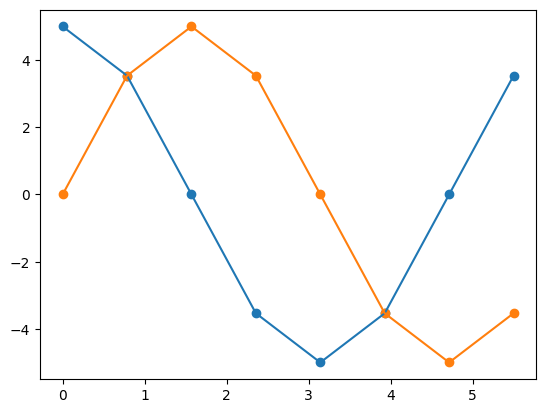

In [45]:
number_of_samples = 8
x = np.linspace(0, 2*np.pi, number_of_samples + 1)
x = x[0:-1]
samples_cos = np.array(5 * np.cos(x))
samples_sin = np.array(5 * np.sin(x))

plt.scatter(x, samples_cos)
plt.scatter(x, samples_sin)
# cos_y_phase_shift = np.array(np.cos(x - np.pi/2)) 
plt.plot(x, samples_cos)
plt.plot(x, samples_sin)
# plt.plot(x, cos_y_phase_shift)

# number_of_samples = 8
# x = np.linspace(0, 2*np.pi, number_of_samples)
# samples = np.array(original(x))

# print(samples)
# plt.scatter(x, samples)



In [59]:
print(f"cos(x) . cos(x) = {samples_cos.dot(np.cos(x)) / (number_of_samples / 2)}")
print(f"cos(x) . sin(x) = {samples_cos.dot(np.sin(x)) / (number_of_samples / 2)}")

print(f"cos(x + 0.25) . cos(x) = {samples_cos.dot(np.cos(x + 0.25)) / (number_of_samples / 2)}")
print(f"cos(x + 0.25) . sin(x) = {samples_cos.dot(np.sin(x + 0.25)) / (number_of_samples / 2)}")

dotshift_1 = samples_cos.dot(np.cos(x + 0.25)) / (number_of_samples / 2)
dotshift_2 = samples_cos.dot(np.sin(x + 0.25)) / (number_of_samples / 2)
# Encodes the magnitude and phase shift of the signal
print(np.sqrt(dotshift_1 ** 2 + dotshift_2 ** 2))
print(np.arctan2(dotshift_2, dotshift_1))

# If the frequency does not align with the signal, then the information encoded will
# not match what we expect.
samples_cos = np.array(5 * np.cos(2 * x))
samples_sin = np.array(5 * np.sin(2 * x))
print(f"cos(2x) . cos(x) = {samples_cos.dot(np.cos(2 * x)) / (number_of_samples / 2)}")
print(f"cos(2x) . sin(x) = {samples_cos.dot(np.sin(2 * x)) / (number_of_samples / 2)}")

# Likewise, 
samples_cos = np.array(5 * np.cos(x))
samples_sin = np.array(5 * np.sin(x))
print(f"cos(x) . cos(2x) = {samples_cos.dot(np.cos(x)) / (number_of_samples / 2)}")
print(f"cos(x) . sin(2x) = {samples_cos.dot(np.sin(x)) / (number_of_samples / 2)}")

cos(x) . cos(x) = 5.0
cos(x) . sin(x) = 2.9046394002824943e-16
cos(x + 0.25) . cos(x) = 4.844562108553224
cos(x + 0.25) . sin(x) = 1.237019796272615
5.0
0.25000000000000006
cos(2x) . cos(x) = 5.0
cos(2x) . sin(x) = 3.0616169978683846e-16
cos(x) . cos(2x) = 5.0
cos(x) . sin(2x) = 2.9046394002824943e-16


In [76]:
number_of_samples = 8
x = np.linspace(0, 2*np.pi, number_of_samples + 1)
x = x[0:-1]
samples = np.array(np.cos(x + 0.25))

def dft_frequency(samples, frequency, N):
    E = np.array([(np.e ** (-2j * np.pi * frequency * n / len(samples))) for n in range(N)]) 
    return samples.dot(E)

result = dft_frequency(samples, 1, number_of_samples)
print(result)
magnitude = np.abs(result) / (number_of_samples / 2)
phase = np.angle(result)
print(magnitude, phase)


(3.8756496868425794+0.9896158370180915j)
1.0000000000000002 0.24999999999999994


[ 0  1  2  3  4  5  6  7  8 -7 -6 -5 -4 -3 -2 -1]
[-15.22975558+0.00000000e+00j   5.14245913-8.00000000e+00j
   1.06926735-1.60000000e+01j   0.48927366+1.60000000e+01j
  -7.70163145+1.15217354e-14j   0.21462574-1.24344979e-14j
   0.17337334-5.32907052e-15j   0.15364146-5.32907052e-15j
   0.14773711-6.89764483e-15j   0.15364146+5.32907052e-15j
   0.17337334+5.32907052e-15j   0.21462574+1.24344979e-14j
  -7.70163145-1.15217354e-14j   0.48927366-1.60000000e+01j
   1.06926735+1.60000000e+01j   5.14245913+8.00000000e+00j]


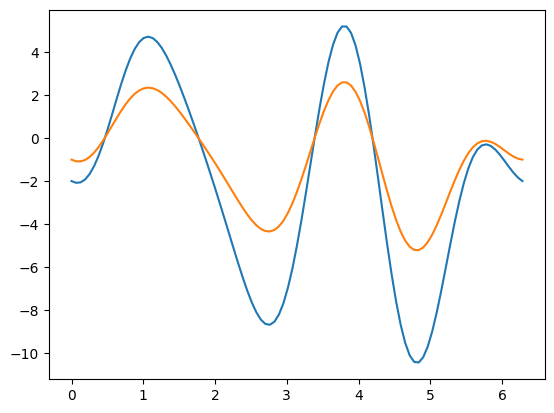

In [91]:
import math

number_of_samples = 16
x = np.linspace(0, 2*np.pi, number_of_samples + 1)
x = x[0:-1]
# samples = np.array(np.cos(x + 0.25))
samples = np.array(original(x))

nyquist_frenquency = math.floor(number_of_samples / 2)
frequencies_to_sample = np.array([
    (f if f <= nyquist_frenquency else -(number_of_samples - f)) for f in range(number_of_samples) 
])
print(frequencies_to_sample)

results = np.array([dft_frequency(samples, f, number_of_samples) for f in frequencies_to_sample])
print(results)

def create_fn(results):
    magnitude = np.abs(results) / (number_of_samples)
    phases = np.angle(results)

    return lambda x: sum([magnitude[i] * np.cos(frequencies_to_sample[i] * x + phases[i]) for i in range(len(results))])

fn = create_fn(results)

x = np.linspace(0, 2*np.pi, 101)
plt.plot(x, fn(x))
plt.plot(x, original(x))

# x = np.linspace(0, 2*np.pi, number_of_samples + 1)
# x = x[0:-1]
# samples = np.array(np.cos(x + 0.25))

# result = dft_frequency(samples, 1, number_of_samples)
# print(result)
# magnitude = np.abs(result) / (number_of_samples / 2)
# phase = np.angle(result)
# print(magnitude, phase)

1.4142135623730951
